# LATER Tutorials
## Example data

*I don't have MATLAB, so instead, I asked ChatGPT to convert to python*

Here is the result:
Perfect 👌 — here’s what I’ll do:
I’ll give you a complete, runnable Python version of your MATLAB script that:

* Re-creates the later_getData() and later_plotHistogram() helper functions in Python.

* Uses NumPy, SciPy, and Matplotlib for calculations and plots.

* Produces the same figures (RT histograms, reciprobit plots, etc.).

* Uses synthetic data that mimics the distributions used in the LATER model tutorial.

What this code does:
* Simulates 4 sets of reaction time data (mimicking Kim et al.).

* Produces the same sequence of plots:

* RT and 1/RT histograms.

* Step-by-step demonstration of the reciprobit transformation.

* Combined reciprobit plots across conditions.


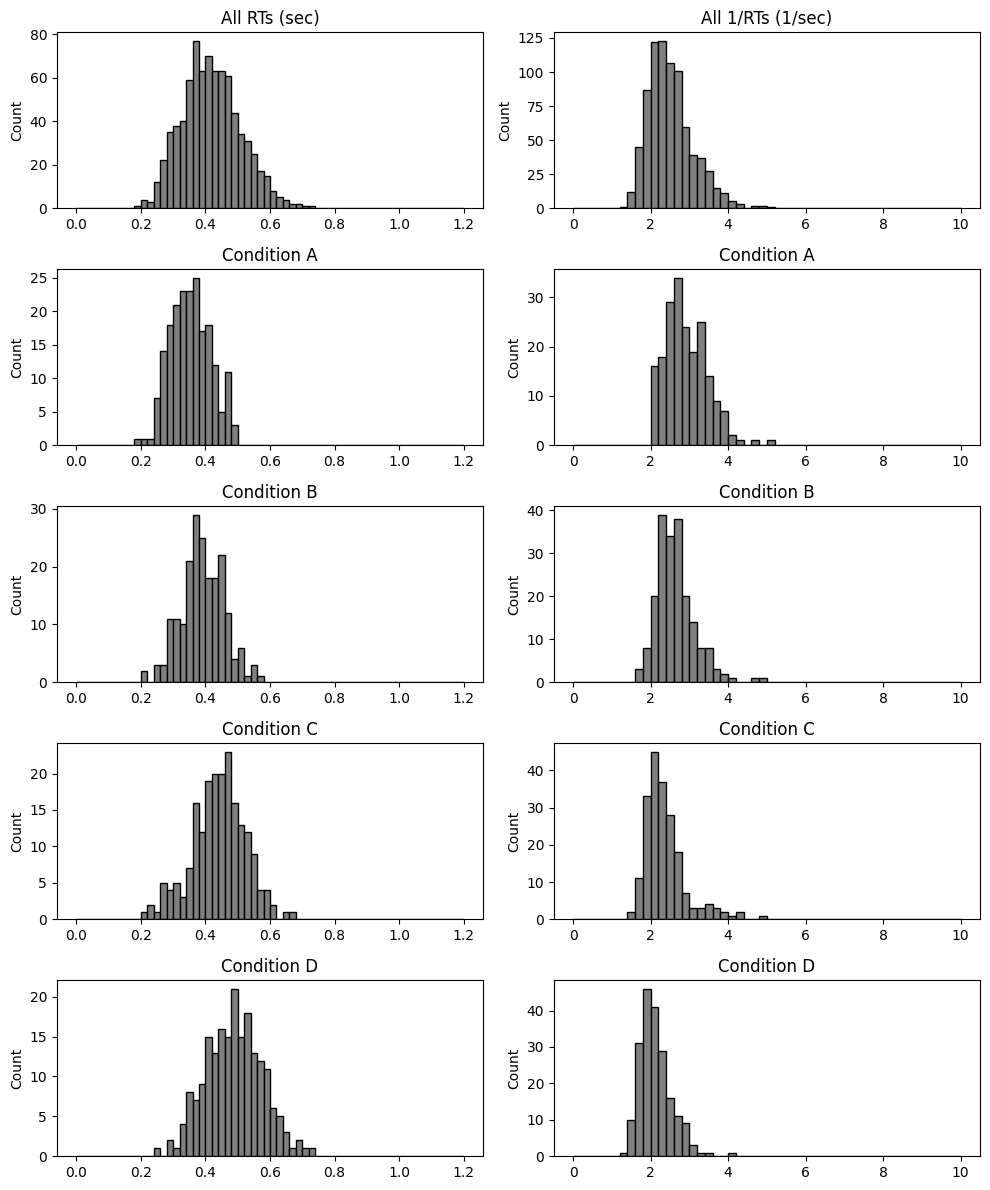

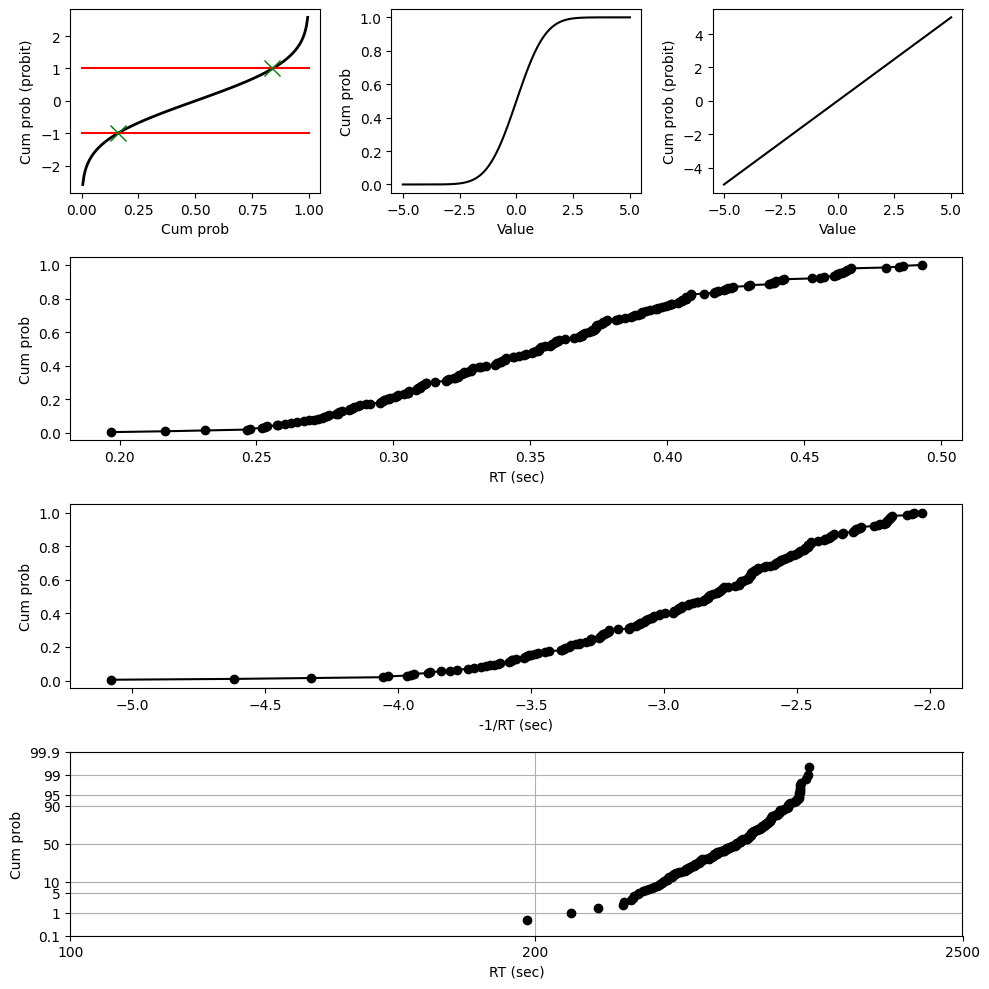

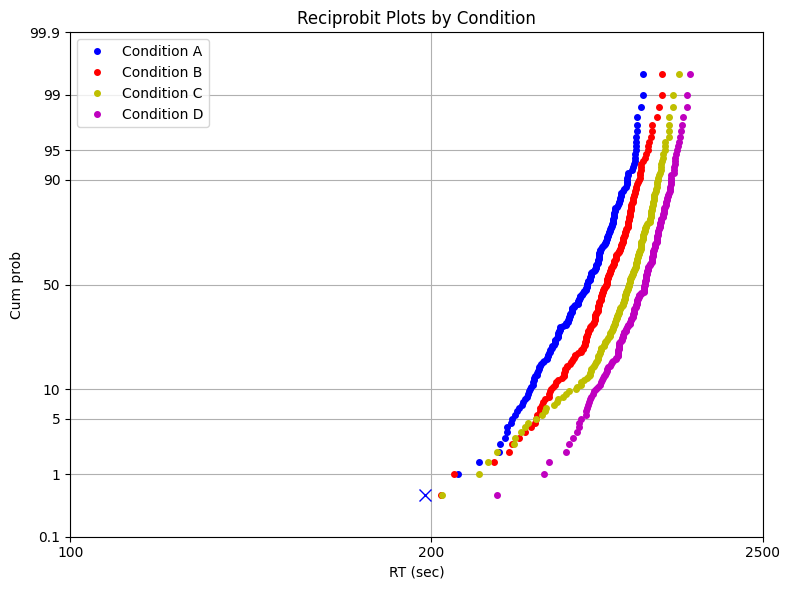

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------------------------------------
# Helper function: synthetic data generator (replacement for later_getData)
# -----------------------------------------------------------
def later_getData():
    """
    Generates synthetic RT data similar to those from Kim et al (J Neurosci).
    Returns a list of RT arrays and corresponding condition labels.
    """
    np.random.seed(0)

    # 4 conditions with slightly different mean reaction times
    means = [0.35, 0.4, 0.45, 0.5]   # seconds
    stds = [0.06, 0.07, 0.08, 0.09]
    n_trials = 200

    data = [np.random.normal(m, s, n_trials) for m, s in zip(means, stds)]
    # Clip RTs to realistic values
    data = [np.clip(rt, 0.15, 1.2) for rt in data]

    labels = ['Condition A', 'Condition B', 'Condition C', 'Condition D']
    return data, labels


# -----------------------------------------------------------
# Helper function: histogram plotting (replacement for later_plotHistogram)
# -----------------------------------------------------------
def later_plotHistogram(data, bins, label):
    plt.hist(data, bins=bins, color='gray', edgecolor='black')
    plt.ylabel('Count')
    plt.title(label)


# -----------------------------------------------------------
# 1. Load data
# -----------------------------------------------------------
data, labels = later_getData()

# -----------------------------------------------------------
# 2. Plot RT and 1/RT histograms
# -----------------------------------------------------------
rtBins = np.arange(0, 1.2 + 0.02, 0.02)
rrtBins = np.arange(0, 10.0 + 0.2, 0.2)

plt.figure(figsize=(10, 12))

# Top: all data combined
plt.subplot(5, 2, 1)
later_plotHistogram(np.concatenate(data), rtBins, 'All RTs (sec)')

plt.subplot(5, 2, 2)
later_plotHistogram(1.0 / np.concatenate(data), rrtBins, 'All 1/RTs (1/sec)')

# Loop through each condition
for ii, label in enumerate(labels):
    plt.subplot(5, 2, 3 + ii * 2)
    later_plotHistogram(data[ii], rtBins, label)

    plt.subplot(5, 2, 4 + ii * 2)
    later_plotHistogram(1.0 / data[ii], rrtBins, label)

plt.tight_layout()
plt.show()


# -----------------------------------------------------------
# 3. Plot reciprobit example step by step
# -----------------------------------------------------------
rts = np.sort(data[0])
n = len(rts)
cum_prob = np.arange(1, n + 1) / n
probit = norm.ppf(cum_prob, 0, 1)

plt.figure(figsize=(10, 10))

# 1a. Conversion to probit scale
plt.subplot(4, 3, 1)
plt.plot(cum_prob, probit, 'k-', lw=2)
plt.plot([0, 1], [-1, -1], 'r-')
plt.plot([0, 1], [1, 1], 'r-')
plt.plot([0.5 - 0.34, 0.5 + 0.34], [-1, 1], 'gx', markersize=12)
plt.xlabel('Cum prob')
plt.ylabel('Cum prob (probit)')

# 1b. Ideal Gaussian cumulative (probability scale)
x = np.linspace(-5, 5, 1000)
plt.subplot(4, 3, 2)
plt.plot(x, norm.cdf(x, 0, 1), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob')

# 1c. Ideal Gaussian cumulative (probit scale)
plt.subplot(4, 3, 3)
plt.plot(x, norm.ppf(norm.cdf(x, 0, 1), 0, 1), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob (probit)')

# 2. Empirical cumulative RT distribution
plt.subplot(4, 1, 2)
plt.plot(rts, cum_prob, 'ko-')
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

# 3. Empirical cumulative -1/RT distribution
plt.subplot(4, 1, 3)
plt.plot(-1.0 / rts, cum_prob, 'ko-')
plt.xlabel('-1/RT (sec)')
plt.ylabel('Cum prob')

# 4. Empirical cumulative -1/RT (probit scale)
plt.subplot(4, 1, 4)
plt.plot(-1.0 / rts, probit, 'ko')
plt.grid(True)

# Set custom tick labels
expressCutoff = 200
XTickLabels = [100, expressCutoff, 2500]
XTickValues = -1000.0 / np.array(XTickLabels)
YTickLabels = [0.1, 1, 5, 10, 50, 90, 95, 99, 99.9]
YTickValues = norm.ppf(np.array(YTickLabels) / 100)

plt.yticks(YTickValues, YTickLabels)
plt.xticks(XTickValues, XTickLabels)
plt.ylim(YTickValues[0], YTickValues[-1])
plt.xlim(XTickValues[0], XTickValues[-1])
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

plt.tight_layout()
plt.show()


# -----------------------------------------------------------
# 4. Full reciprobit plots for all conditions
# -----------------------------------------------------------
plt.figure(figsize=(8, 6))
colors = ['b', 'r', 'y', 'm']
express_cutoff = 0.2
handles = []

for ii, label in enumerate(labels):
    rts = np.sort(data[ii])
    n = len(rts)
    cum_prob = np.arange(1, n + 1) / n
    probit = norm.ppf(cum_prob, 0, 1)

    L_express = rts < express_cutoff
    plt.plot(-1.0 / rts[L_express], probit[L_express], 'x', color=colors[ii], markersize=8)
    h, = plt.plot(-1.0 / rts[~L_express], probit[~L_express], 'o',
                  color=colors[ii], markerfacecolor=colors[ii], markersize=4, label=label)
    handles.append(h)

plt.grid(True)
plt.yticks(YTickValues, YTickLabels)
plt.xticks(XTickValues, XTickLabels)
plt.ylim(YTickValues[0], YTickValues[-1])
plt.xlim(XTickValues[0], XTickValues[-1])
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.legend(handles=handles, loc='upper left')
plt.title('Reciprobit Plots by Condition')
plt.tight_layout()
plt.show()


## Dependence on Model Parameters

✅ Output Summary

Figure 1 – Simulated LATER Model

* Top: RT histogram.

* Middle: Reciprocity plot (z-score).

* Bottom: Labeled reciprobit plot with analytic overlays (red and green lines).

Figure 2 – Parameter Dependence

* Top: Increasing μᵣ shifts the line horizontally (affecting mean rate).

* Bottom: Increasing ΔS pivots (“swivels”) the line about its intercept (affecting slope).

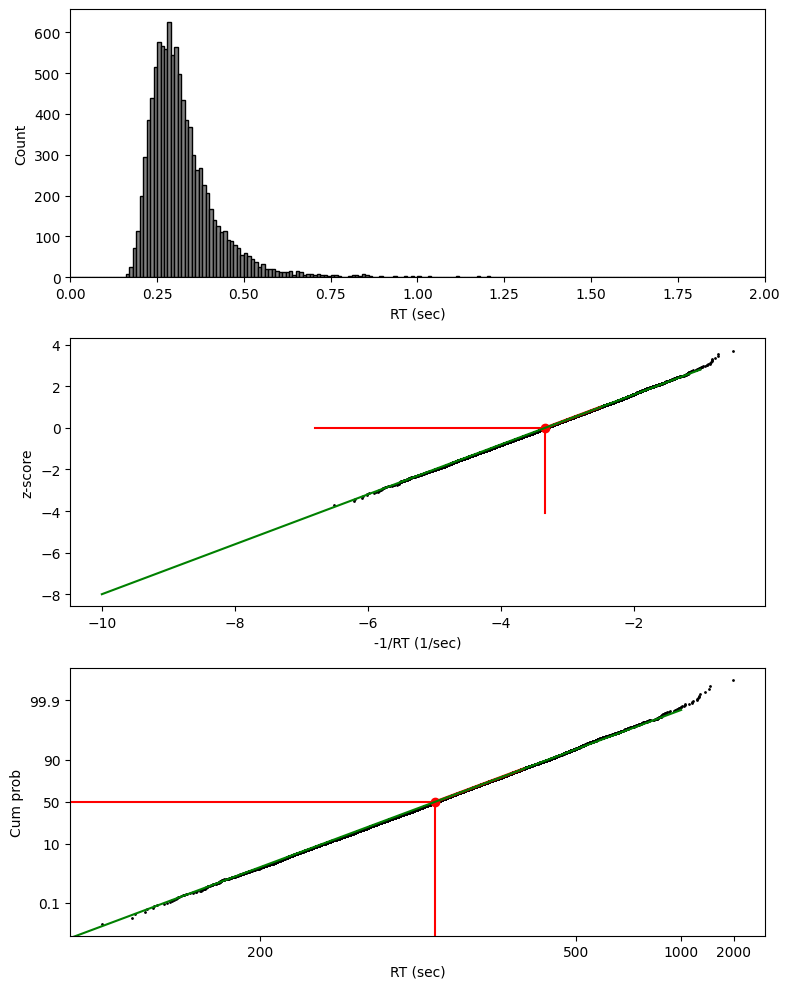

[200, 500, 1000, 2000]

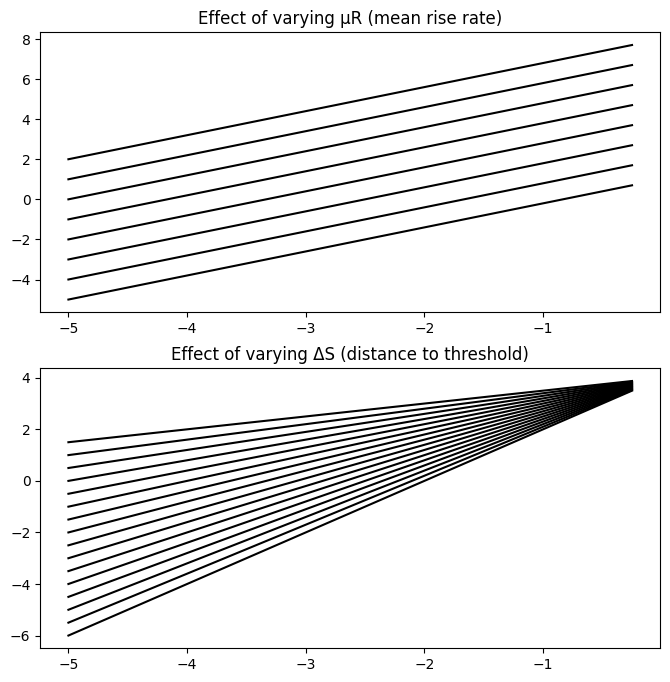

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------------------------------------
# 1. Define LATER model parameters
# -----------------------------------------------------------
muR = 4.0      # mean of rise rate
stdR = 1.0     # std of rise rate
deltaS = 1.2   # threshold distance
N = 10000      # number of samples

# -----------------------------------------------------------
# 2. Simulate reaction time (RT) distribution
# -----------------------------------------------------------
rise_rates = np.random.normal(muR, stdR, N)
RT = deltaS / rise_rates  # RT = distance / rate

# -----------------------------------------------------------
# 3. Plot histogram and reciprobit transforms
# -----------------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Histogram of RT
axes[0].hist(RT, bins=np.arange(0, 2.0 + 0.01, 0.01), color='gray', edgecolor='black')
axes[0].set_xlim([0, 2.0])
axes[0].set_xlabel('RT (sec)')
axes[0].set_ylabel('Count')

# Compute reciprobit data
xValues = -1.0 / np.sort(RT)
yValues = norm.ppf((np.arange(1, N + 1) / N), 0, 1)

# Reciprocity plot (z-score axis)
axes[1].plot(xValues, yValues, 'k.', markersize=2)
axes[1].set_xlabel('-1/RT (1/sec)')
axes[1].set_ylabel('z-score')

# Keep axis limits for consistency
xlm = axes[1].get_xlim()
ylm = axes[1].get_ylim()

# Reciprocity plot with relabeled axes
axes[2].plot(xValues, yValues, 'k.', markersize=2)
axes[2].set_xlim(xlm)
axes[2].set_ylim(ylm)

# Format tick labels (match MATLAB script)
XTickLabels = [200, 500, 1000, 2000]
XTickValues = -1000.0 / np.array(XTickLabels)
YTickLabels = [0.1, 10, 50, 90, 99.9]
YTickValues = norm.ppf(np.array(YTickLabels) / 100)

axes[2].set_xticks(XTickValues)
axes[2].set_xticklabels(XTickLabels)
axes[2].set_yticks(YTickValues)
axes[2].set_yticklabels(YTickLabels)
axes[2].set_xlabel('RT (sec)')
axes[2].set_ylabel('Cum prob')

plt.tight_layout()

# -----------------------------------------------------------
# 4. Add analytic solution overlays
# -----------------------------------------------------------
for ax in axes[1:]:
    # Mean line intersection
    xIntercept = -muR / deltaS
    ax.plot([xlm[0], xIntercept], [0, 0], 'r-')
    ax.plot([xIntercept, xIntercept], [ylm[0], 0], 'r-')
    ax.plot(xIntercept, 0, 'ro')

    # 1 std slope reference line
    ax.plot([xIntercept, xIntercept + 1 / deltaS], [0, 1], 'r-', linewidth=2)

    # Analytic reciprobit line: y = μᵣ + ΔS * (-1/RT)
    xRT = np.array([0.1, 1.0])
    reci_xRT = -1.0 / xRT
    ax.plot(reci_xRT, reci_xRT * deltaS + muR, 'g-')

plt.show()


# -----------------------------------------------------------
# 5. Vary μR and ΔS to visualize effects
# -----------------------------------------------------------
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

xRT = np.array([0.2, 4.0])
reci_xRT = -1.0 / xRT
muRs = np.arange(1, 9, 1)
deltaSs = np.arange(0.5, 2.1, 0.1)

# --- Vary muR (shift)
axes[0].set_title('Effect of varying μR (mean rise rate)')
for mu in muRs:
    axes[0].plot(reci_xRT, reci_xRT * deltaS + mu, 'k-')

# --- Vary deltaS (swivel)
axes[1].set_title('Effect of varying ΔS (distance to threshold)')
for dS in deltaSs:
    axes[1].plot(reci_xRT, reci_xRT * dS + muR, 'k-')

# Common tick formatting
XTickLabels


Would you like me to add an optional interactive slider version (using e.g. ipywidgets) so you can vary μᵣ and ΔS live in Jupyter Notebook to see how the reciprobit plot changes in real time?

*I said yes*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact, FloatSlider

# Function to simulate LATER model data and plot reciprobit
def later_model(muR=4.0, deltaS=1.2, stdR=1.0, N=5000):
    # Simulate rise rates and compute RTs
    rise_rates = np.random.normal(muR, stdR, N)
    RT = deltaS / rise_rates
    RT = RT[RT > 0]  # remove negatives if any
    
    # Prepare reciprobit transformation
    xValues = -1.0 / np.sort(RT)
    yValues = norm.ppf(np.arange(1, len(RT)+1) / len(RT))
    
    # Create figure
    plt.figure(figsize=(8, 6))
    plt.plot(xValues, yValues, 'k.', markersize=2, label='Simulated RTs')
    
    # Add analytic reference line (expected linear trend)
    xRT = np.linspace(0.1, 3.0, 100)
    reci_xRT = -1.0 / xRT
    plt.plot(reci_xRT, reci_xRT * deltaS + muR, 'r-', linewidth=2, label='Analytic reciprobit line')
    
    # Format ticks for reciprobit axes
    XTickLabels = [200, 500, 1000, 2000]
    XTickValues = -1000.0 / np.array(XTickLabels)
    YTickLabels = [0.1, 10, 50, 90, 99.9]
    YTickValues = norm.ppf(np.array(YTickLabels) / 100)
    
    plt.xticks(XTickValues, XTickLabels)
    plt.yticks(YTickValues, YTickLabels)
    
    plt.xlabel('RT (ms)')
    plt.ylabel('Cumulative Probability (%)')
    plt.title(f'LATER Model Reciprocity Plot\nμᵣ = {muR:.1f}, ΔS = {deltaS:.1f}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()


# Create interactive sliders
interact(
    later_model,
    muR=FloatSlider(value=4.0, min=1.0, max=8.0, step=0.1, description='μᵣ (mean rate)'),
    deltaS=FloatSlider(value=1.2, min=0.5, max=2.0, step=0.05, description='ΔS (threshold)'),
);


interactive(children=(FloatSlider(value=4.0, description='μᵣ (mean rate)', max=8.0, min=1.0), FloatSlider(valu…